<a href="https://colab.research.google.com/github/elpinchepastel/ML_DP/blob/main/meters_mile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary
import tensorflow as tf
import numpy as np
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Millas = Metros / 1609,344

In [3]:
# Let's import to connect Colab with the information in Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# We navigate to the folder with the content
%cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [5]:
!ls

df_hist.png  medida.csv  mtcars.csv  orangeec.csv


In [6]:
# We create a string with the name of the file 
ruta_archivo = '/content/drive/My Drive/Dataset/{}'.format('medida.csv')

In [7]:
df = pd.read_csv(ruta_archivo)

In [8]:
# Size DataFrame and info
print(df.shape)
df

(1048575, 2)


,metro,milla
0,550,0.341755
1,992,0.616402
2,664,0.412591
3,313,0.194490
4,570,0.354182
...,...,...
1048570,335,0.208160
1048571,939,0.583469
1048572,762,0.473486
1048573,968,0.601489


In [9]:
# Create np array of dataframe
metro = df['metro'].to_numpy(np.int)
milla = df['milla'].to_numpy(np.float64)

In [10]:
# Create network neural
oculta_1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta_2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta_1, oculta_2, salida])

In [11]:
# Create model
modelo.compile(
    optimizer=tf.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [12]:
# Training model
print("Stared training...")
historial = modelo.fit(metro, milla, steps_per_epoch=50, epochs=50, verbose=False)
print("Model train...")

Stared training...
Model train...


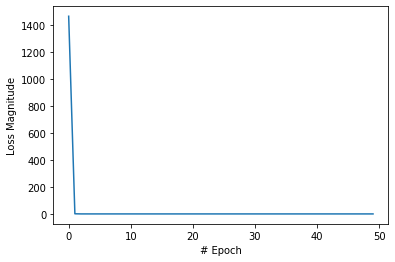

In [13]:
# Print loss magnitude loss
plt.xlabel('# Epoch')
plt.ylabel('Loss Magnitude')
plt.plot(historial.history['loss'])

In [14]:
print("Let's make a prediction")
result = modelo.predict([1])
print('The result is {} miles'.format(str(result)))

Let's make a prediction
The result is [[0.0006206]] miles


In [15]:
print("Internal variables of the model")
print(oculta_1.get_weights())
print(oculta_2.get_weights())
print(salida.get_weights())

Internal variables of the model
[array([[ 0.00702076,  0.27302098, -0.06598429]], dtype=float32), array([ 0.25916442, -0.60370755,  0.36249706], dtype=float32)]
[array([[-0.23944081, -0.8014094 ,  0.1557707 ],
       [ 0.46157235,  0.2480005 , -0.05602044],
       [ 1.0811361 ,  0.5300122 ,  0.3438012 ]], dtype=float32), array([-0.4349664 ,  0.48313597,  0.37956914], dtype=float32)]
[array([[-0.04270007],
       [ 0.22759685],
       [ 0.08907733]], dtype=float32), array([-0.14024979], dtype=float32)]
